In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate 
from scipy import integrate
from scipy import signal

cos = np.cos
sin = np.sin
pi = np.pi

# Question 1

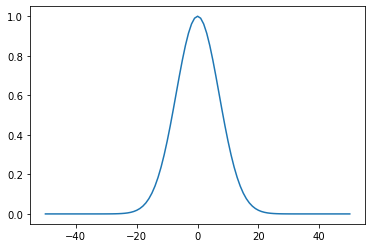

In [51]:
# THE GAUSSIAN WITH TAU = 100 and centered at 50
x = np.linspace(-50,50, 101)
g = np.exp(-1*(x)**2/100)
plt.plot(x, g)
plt.show()

In [52]:
# Routine to shift the gaussian:
def shift(g, shift_to):
    delta = signal.unit_impulse(len(g), shift_to)
    g_fft = np.fft.fft(g)
    delta_fft = np.fft.fft(delta)
    g_shift = np.fft.ifft(g_fft * delta_fft)
    g_shift = np.real(g_shift)
    return g_shift

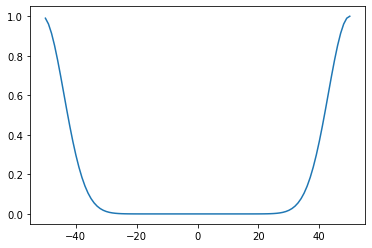

In [53]:
shift_to = len(g)//2
g_shift = shift(g, shift_to)
plt.plot(x, g_shift)
plt.show()

# Question 2:

In [54]:
def corr_func(f, g):
    f_fft = np.fft.fft(f)
    g_fft = np.fft.fft(g)
    function = np.fft.ifft(f_fft * np.conjugate(g_fft))
    return function

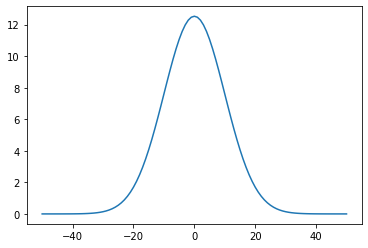

In [55]:
correlation = corr_func(g, g)
plt.plot(x, np.abs(np.fft.fftshift(correlation)))
plt.show()

# Question 3

In [56]:
def correlation(g, shift_to):
    g_shift = shift(g, shift_to)
    function = corr_func(g_shift, g)
    function = np.abs(np.fft.fftshift(function))
    return g_shift, function

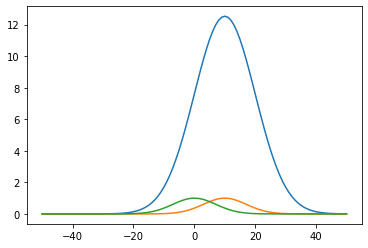

In [57]:
[g_shift, gauss_correlation] = correlation(g, 10) # Shift by 20 points

plt.plot(x, gauss_correlation)
plt.plot(x, g_shift)
plt.plot(x, g)
plt.show()

The correlation function should be peaking high where the 2 gaussians are nearby each other because correlation tells us how similar the 2 functions are. This doesn't suprise me

# Question 4

In [58]:
def convo_pad(g, f):
    g_pad = np.zeros(len(g)*2)
    f_pad = np.zeros(len(f)*2)
    g_pad[(len(g)//2):-(len(g)//2 +1)] = g # padding zeros to the g function
    f_pad[(len(f)//2):-(len(f)//2 +1)] = f # padding zeros to the f function
    g_pad_ft = np.fft.fft(g_pad) # FFT of g_pad
    f_pad_ft = np.fft.fft(f_pad) # FFT of f_pad
    convo = np.fft.ifft(g_pad_ft*f_pad_ft)
    return convo


By padding the beginning and the end of the data with zeros, we have effectively make sure that no sudden jump 
in the data will be manufactured by the wrap-around effect coming from dft.

# Question 5

In [59]:
# PART A: Please find in the attached pdf

In [60]:
# PART B: Please find in the attached pdf

In [61]:
# PART C

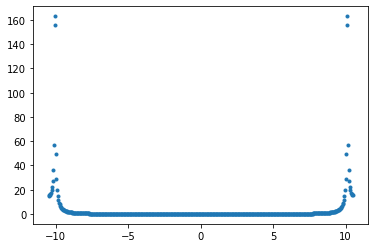

In [62]:
## Evaluate from the FFT
K = 10.5
N = 500
x = np.arange(N)
k = np.linspace(-K, K, N)
sine = sin(2*pi*x*K/N)
sine_ft = np.fft.fft(sine)
plt.plot(k, np.abs(sine_ft), '.')
plt.show()

In [63]:
# Evaluate from the function derived in the attached pdf
def geometric(k, K, N):
    first = (1 - np.exp(-2*pi*i*(k - K))) / (1 - np.exp(-2*pi*i*(k - K)/N))
    second = (1 - np.exp(-2*pi*i*(k + K))) / (1 - np.exp(-2*pi*i*(k + K)/N))
    return first - second


According to our analytic solution, it should give rise to a half of N (which is 250) at k=K=10.5. However, we can see that the FFT evaluation has a lower amplitude at K = 10.5. This is spectral leakage.

In [64]:
# PART D

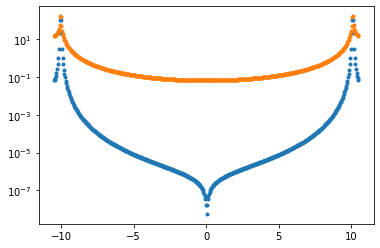

In [65]:
# The window
xx = np.linspace(0, N, N) * 2*pi
win=0.5 - 0.5*np.cos(xx)

# Multiply it with our sine and plot the fourier transform
sine_win = sine * win
sine_fft_win = np.fft.fft(sine_win)
plt.semilogy(k, np.abs(sine_fft_win), '.')
plt.plot(k, np.abs(sine_ft), '.')
plt.show()

We can see that the leak is getting thousands time better

In [67]:
# PART E: Please find in the attached pdf